# Hurto Celulares
##### Ruben Pinedo- Harlin Acero Acero - Jeyson Acero

In [1]:
# Importamos las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sp

In [2]:
# leemos el archivo
df = pd.read_csv("./hurtos.csv",sep=";")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91098 entries, 0 to 91097
Data columns (total 24 columns):
Fecha                 91098 non-null object
Departamento          91098 non-null object
Municipio             91098 non-null object
Día                   91098 non-null object
Hora                  91098 non-null object
Barrio                91098 non-null object
Cuadrante             91098 non-null object
Zona                  91098 non-null object
Clase de sitio        91098 non-null object
Arma empleada         91098 non-null object
Móvil Agresor         91098 non-null object
Móvil Victima         91098 non-null object
Edad                  91098 non-null object
Sexo                  91098 non-null object
Estado civil          91098 non-null object
País de nacimiento    91098 non-null object
Clase de empleado     91098 non-null object
Profesión             91098 non-null object
Escolaridad           91098 non-null object
Código DANE           91098 non-null int64
CLASE       

In [3]:
# Ya que solo hay dos valores cuantitativos, solo se imprimen los estadísticos de estos
print(df.describe())

       Código DANE      Cantidad
count      91098.0  91098.000000
mean    11001000.0      1.108599
std            0.0      2.159649
min     11001000.0      1.000000
25%     11001000.0      1.000000
50%     11001000.0      1.000000
75%     11001000.0      1.000000
max     11001000.0    250.000000


### Limpieza de datos

In [4]:
#Creamos un nuevo dataset solo con las columnas más necesarias
df1 = df[["Barrio", "Edad", "Fecha", "Día", "Zona", "Arma empleada", "Clase de sitio", "Móvil Agresor", "Estado civil", "MARCA", "Cantidad"]]
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91098 entries, 0 to 91097
Data columns (total 11 columns):
Barrio            91098 non-null object
Edad              91098 non-null object
Fecha             91098 non-null object
Día               91098 non-null object
Zona              91098 non-null object
Arma empleada     91098 non-null object
Clase de sitio    91098 non-null object
Móvil Agresor     91098 non-null object
Estado civil      91098 non-null object
MARCA             91098 non-null object
Cantidad          91098 non-null float64
dtypes: float64(1), object(10)
memory usage: 7.6+ MB


In [5]:
# Se debe convertir la columna edad a tipo entero o número
df1["Edad2"] = pd.to_numeric(df1["Edad"], errors='coerce')
df1[["Edad","Edad2"]]

C:\Users\harfe\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Edad,Edad2
0,62,62.0
1,27,27.0
2,56,56.0
3,27,27.0
4,31,31.0
5,-,NaN
6,32,32.0
7,-,NaN
8,26,26.0
9,29,29.0


In [6]:
# Buscamos valores nullos e indefinidos
for column in df1.columns:
    print("Número de vacios en la columnna {} es: {} ".format(column, str(sum(pd.isna(df1[column])))))

Número de vacios en la columnna Barrio es: 0 
Número de vacios en la columnna Edad es: 0 
Número de vacios en la columnna Fecha es: 0 
Número de vacios en la columnna Día es: 0 
Número de vacios en la columnna Zona es: 0 
Número de vacios en la columnna Arma empleada es: 0 
Número de vacios en la columnna Clase de sitio es: 0 
Número de vacios en la columnna Móvil Agresor es: 0 
Número de vacios en la columnna Estado civil es: 0 
Número de vacios en la columnna MARCA es: 0 
Número de vacios en la columnna Cantidad es: 0 
Número de vacios en la columnna Edad2 es: 1950 


La variable Edad2, que es la misma edad pero de tipo numérico, tiene 1950 valores null. Los reemplazamos con el promedio

In [7]:
# Llenamos los valores nullos de Edad2 con la moda del dataset
df1["Edad2"] = df1["Edad2"].fillna(int(df1["Edad2"].mean()))
df1[["Edad","Edad2"]]

C:\Users\harfe\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Edad,Edad2
0,62,62.0
1,27,27.0
2,56,56.0
3,27,27.0
4,31,31.0
5,-,32.0
6,32,32.0
7,-,32.0
8,26,26.0
9,29,29.0


##### Buscamos los valores atípicos
Solo de hacerse con las columnas de Edad y Cantidad

In [8]:
#Utilizamos la siguiente función para identificar los niveles de ruido en el data set
def detect_outlier(data_1):
    outliers=[]
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [9]:
print('Edad2 -> '+ str(detect_outlier(df1["Edad2"])))
print('Cantidad -> '+ str(detect_outlier(df1["Cantidad"])))

Edad2 -> [73.0, 81.0, 71.0, 69.0, 69.0, 70.0, 71.0, 71.0, 71.0, 69.0, 73.0, 70.0, 69.0, 82.0, 76.0, 73.0, 71.0, 69.0, 72.0, 78.0, 78.0, 70.0, 82.0, 70.0, 77.0, 75.0, 72.0, 69.0, 75.0, 70.0, 79.0, 74.0, 83.0, 75.0, 73.0, 72.0, 73.0, 72.0, 80.0, 70.0, 70.0, 77.0, 70.0, 76.0, 71.0, 77.0, 70.0, 70.0, 71.0, 75.0, 69.0, 73.0, 74.0, 69.0, 70.0, 71.0, 72.0, 71.0, 87.0, 84.0, 71.0, 77.0, 75.0, 69.0, 72.0, 69.0, 77.0, 71.0, 72.0, 69.0, 84.0, 70.0, 74.0, 70.0, 69.0, 88.0, 73.0, 70.0, 79.0, 74.0, 75.0, 77.0, 70.0, 74.0, 75.0, 75.0, 70.0, 76.0, 71.0, 72.0, 73.0, 69.0, 72.0, 69.0, 70.0, 76.0, 72.0, 75.0, 71.0, 71.0, 74.0, 82.0, 74.0, 81.0, 70.0, 72.0, 75.0, 77.0, 87.0, 75.0, 75.0, 77.0, 90.0, 71.0, 73.0, 74.0, 74.0, 75.0, 76.0, 79.0, 88.0, 69.0, 73.0, 72.0, 74.0, 71.0, 72.0, 69.0, 70.0, 71.0, 70.0, 71.0, 69.0, 74.0, 69.0, 82.0, 75.0, 74.0, 73.0, 72.0, 70.0, 78.0, 75.0, 72.0, 73.0, 70.0, 71.0, 70.0, 72.0, 79.0, 77.0, 77.0, 72.0, 69.0, 71.0, 74.0, 81.0, 78.0, 70.0, 78.0, 73.0, 69.0, 75.0, 77.0, 71.0, 

In [11]:
#Obtenemos los estadísticos para la columna edad2
df1["Edad2"].describe()

count    91098.000000
mean        32.254715
std         11.926609
min         -1.000000
25%         23.000000
50%         30.000000
75%         38.000000
max        248.000000
Name: Edad2, dtype: float64

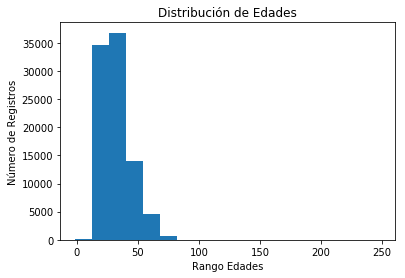

In [51]:
# Función Sturges para calcular de forma correcta el númerode bins
k = int(np.ceil(1 + np.log2(df1["Edad2"].count())))
plt.hist(df1["Edad2"],bins=k)
plt.title('Distribución de Edades')
plt.xlabel('Rango Edades')
plt.ylabel('Número de Registros')
plt.show()

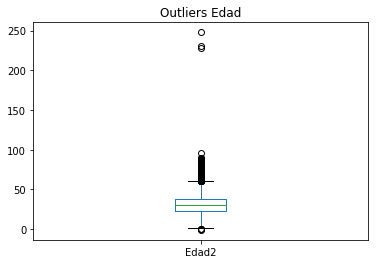

In [14]:
df1["Edad2"].plot(kind="box",title="Outliers Edad")

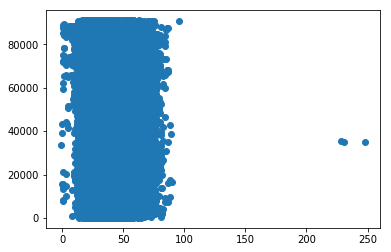

In [38]:
plt.scatter(df1["Edad2"], np.arange(len(df1["Edad2"])))

#### Conclusión sobre la Edad

Aunque el promedio de edad es de 32 en un rango prácticamente de 0 a 100, existe una desviación considerable de 11, lo que, junto con la función dectect_outliers, los estadísticos, el histograma y el boxplot muestran claramente la existencia de valores atípicos para las edades, donde se encuentran edades desde -1 hasta 248, como máximo. Es necesario normalizar dichos valores.

In [35]:
df1[df1["Edad2"] > 100]


,Barrio,Edad,Fecha,Día,Zona,Arma empleada,Clase de sitio,Móvil Agresor,Estado civil,MARCA,Cantidad,Edad2,Edad_normalized,Edad2_sav
35165,BELLA SUIZA E-1,231,21/01/2017,Sábado,URBANA,SIN EMPLEO DE ARMAS,VIAS PUBLICAS,A PIE,CASADO,NO REPORTADO,1.0,231.0,16.664023,8.401497
35166,BELLA SUIZA E-1,248,21/01/2017,Sábado,URBANA,ARMA DE FUEGO,VIAS PUBLICAS,PASAJERO VEHICULO,-,NO REPORTADO,1.0,248.0,18.089407,8.401497
35347,BELLA SUIZA E-1,228,23/01/2017,Lunes,URBANA,ARMA BLANCA / CORTOPUNZANTE,VIAS PUBLICAS,PASAJERO MOTOCICLETA,SOLTERO,NO REPORTADO,1.0,228.0,16.412485,8.401497


In [30]:
df1["Edad2_sav"] = np.where((df1["Edad2"] > (df1["Edad2"].mean()) + (2*df1["Edad2"].std())) |
                                    (df1["Edad2"] > (df1["Edad2"].mean()) - (2*df1["Edad2"].std())), 
                                 ((df1["Edad2"].mean()) - (2*df1["Edad2"].std())),
                                ((df1["Edad2"].mean()) + (2*df1["Edad2"].std())))
df1[["Edad2","Edad2_sav"]].describe()

C:\Users\harfe\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Edad2,Edad2_sav
count,91098.000000,91098.000000
mean,32.254715,8.435013
std,11.926609,1.264044
min,-1.000000,8.401497
25%,23.000000,8.401497
50%,30.000000,8.401497
75%,38.000000,8.401497
max,248.000000,56.107932


### Cantidad

In [17]:
# Obtenemos los estadísticos
df1["Cantidad"].describe()

count    91098.000000
mean         1.108599
std          2.159649
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        250.000000
Name: Cantidad, dtype: float64

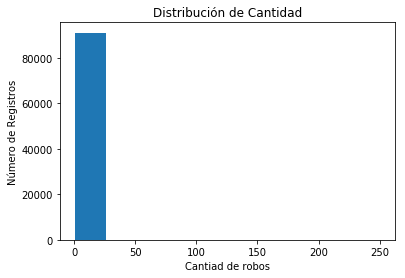

In [18]:
# Distribución de los datos
plt.hist(df1["Cantidad"])
plt.title('Distribución de Cantidad')
plt.xlabel('Cantiad de robos')
plt.ylabel('Número de Registros')
plt.show()

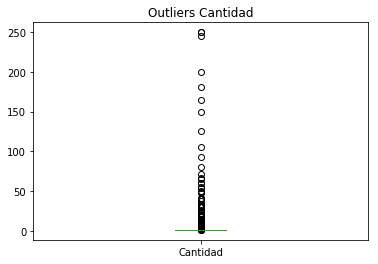

In [22]:
df1["Cantidad"].plot(kind="box",title="Outliers Cantidad")

#### Conclusión sobre la variable Cantidad
Podría decirse que cada registro corresponde a un robo, por tanto, la cantidad tiende a ser siempre 1 por registro, salvo algunas excepciones, tal como lo muestra el promedio y la desviación estandar. Sin embargo, existen valores atípicos como una cantidad de 280 robos en un registro. Por lo tanto, la columna con la variable de cantidad también es candidata a normalizción.

#### Corrección de los valores atípicos

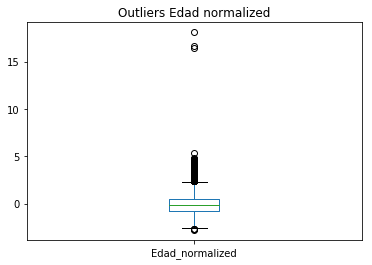

In [29]:
df1["Edad_normalized"].plot(kind="box",title="Outliers Edad normalized")

In [11]:
# Calculamos el total de robos por categoría
for column in df1.columns:
    print("=============== Robo por {} ===================".format(column))
    print(df1.groupby(column).agg({"Cantidad":"sum"}))

=============== Robo por Barrio ===================
                                      Cantidad
Barrio                                        
-                                         53.0
12 DE OCTUBRE E-12                        97.0
7 DE AGOSTO E-12                         350.0
A.S.D. E-1                                 3.0
A.S.D. E-19                                3.0
ABRAHAM LINCON E-6                        77.0
ABRAHAM LINCON E-8                        38.0
ACACIAS E-11                              15.0
ACACIAS III PARTE BAJA E-19                8.0
ACACIAS IV E-19                            4.0
ACACIAS NORTE E-1                         37.0
ACACIAS SUR E-19                          10.0
ACAIMA E-11                                4.0
ACAPULCO E-10                             33.0
ACAPULCO E-11                              1.0
ACAPULCO E-5                               6.0
ACATAMA E-8                               10.0
ACEVEDO TEJADA E-13                      128.0
ACIP E-8

In [22]:
# Observamos que existen valores atípicos, los filtramos
age ="18"
int_age = int(age)
print(int_age)

18
